In [1]:
import random
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train/255, x_test/255

train_filter = np.where((y_train == 0 ) | (y_train == 6))
test_filter = np.where((y_test == 0) | (y_test == 6))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

TRAIN_LENGTH = len(x_train) # 12665
TEST_LENGTH = len(x_test) # 2115

# 1s and 0s:
# y_train = np.array([2*i-1 for i in y_train])
# y_test = np.array([2*i-1 for i in y_test])

y_train = 2 * np.array([i/6 for i in y_train]) - 1
y_test = 2 * np.array([i/6 for i in y_test]) - 1


In [3]:
def sign(x):
    if x < 0:
        return -1
    return 1

def validate():
    x  = x_test
    input_layer = x.reshape(-1, 784, 1)
    z1 = np.matmul(output_w, input_layer) + output_b
    y  = np.array([sign(i) for i in z1])
    equals = y == y_test
    accuracy = np.average(equals)
    return accuracy

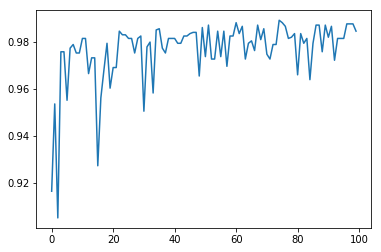

In [11]:
lr = 0.1

output_w = 2 * np.random.rand(1, 784) - 1
output_b = 2 * np.random.rand(1,  1 ) - 1

accuracies = [] 
for i, x in enumerate(x_train[0:10000]):
# for i in range(1):
    # x = x_train[i]
    input_layer = x.reshape(784, 1)
    label = y_train[i]
    # Forward
    z1 = np.matmul(output_w, input_layer) + output_b
    y  = sign(z1)

    output_w_grad = (label - y) * input_layer.transpose()
    output_b_grad = (label - y) 

    output_w = output_w + lr * (output_w_grad)
    output_b = output_b + lr * (output_b_grad)

    if (i+1)%100 == 0:
        accuracy = validate()
        accuracies.append(accuracy)

# df = pd.DataFrame()
# df = pd.load_csv('preceptron_lr.csv')
# index = 'lr = {}'.format(lr)
# df[index] = accuracies

plt.plot(accuracies)


30

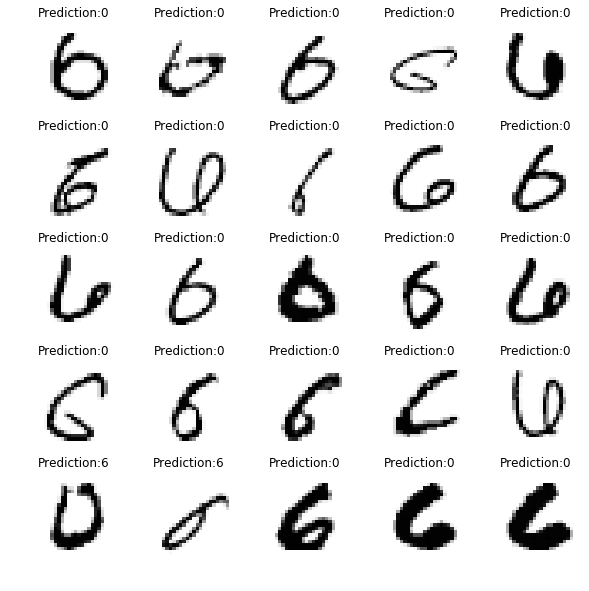

In [13]:
input_layer = x_test.reshape(-1, 784, 1)
# Forward
z1 = np.matmul(output_w, input_layer) + output_b
y  = np.array([sign(i) for i in z1])

false_index = []
for i, label in enumerate(y_test):
    if label != y[i]:
        false_index.append(i)

fig, axs = plt.subplots(5, 5)
fig.set_size_inches(10,10)

for i, ax in enumerate(axs.flat):
    index = false_index[i]
    ax.imshow(x_test[index], cmap = 'Greys')
    ax.set_title('Prediction:{}'.format(str((y[index]+1)*3)))
    ax.axis('off')

len(false_index)
# 'Prediction: {}'.format(str(y[index]))
    

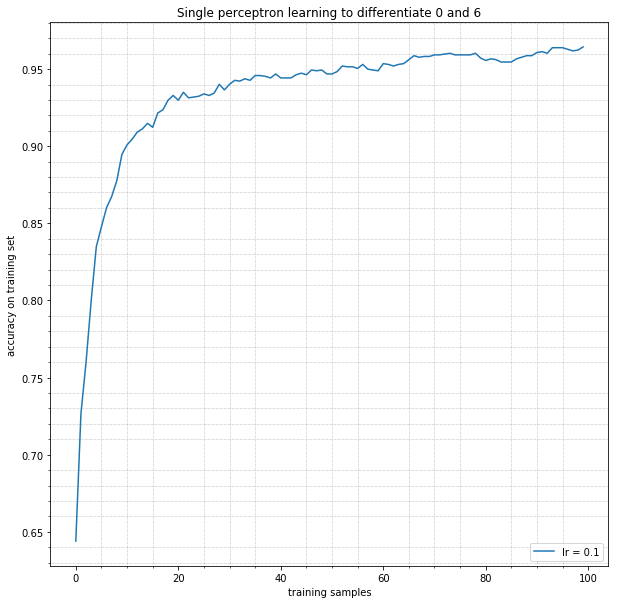

In [10]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)

ax.plot(accuracies, label = 'lr = 0.1')
# ax.plot(df.iloc[:, 1], label = 'lr = 0.01')
# ax.plot(df.iloc[:, 2], label = 'lr = 0.001')
ax.set_title('Single perceptron learning to differentiate 0 and 6')

ax.legend(loc = 'lower right', markerscale=20)
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
ax.set_axisbelow(True)
ax.minorticks_on()
ax.set_xlabel('training samples')
ax.set_ylabel('accuracy on training set')

# df.to_csv('perceptron_lr.csv')
# plt.savefig('images/perceptron_0_6.png',dpi = 300)

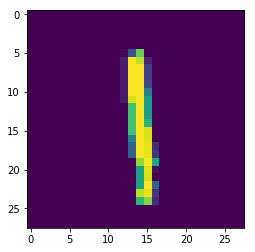

In [11]:
'''

Input(784, 1) -> Output Layer (10, 1)

Input: 784 x 1

output layer: 1 neuron
* output_w = 1 x 784
* output_b = 1 x 1


Forward pass:

x -> input                          784 x 1

z1 = output_w * Input + output_b    1 x 1
y  = sign(z1)                       1 x 1

Gradient Descent:
                      1 x 1          (784 x 1)^T
output_w_grad = (label - y) *       Input
output_b_grad = (label - y) 

output_w = output_w + lr * (output_w_grad)
output_b = output_b + lr * (output_b_grad)

'''